# Notebook - showing how to detect JIPs
This is the notebook for the minimal features model (DAS44) to identify JIPs. Here you only need DAS44, no lab (except for ACPA & RF) to identify the JIPs

## 1. Feature engineering

### 1.1 import example data

In [6]:
import pandas as pd

# Get Original clustering metadata (same samples as development set)
# Not in the github data (due to .gitignore)
# you can find the original Leiden EHR data here: 
metadata = pd.read_csv('../data/MMAE_clustering_270.csv', index_col=0)

### 1.2 Calculate joint region features based on DAS44 joint scheme

#### Define joint regions

In [12]:
L_Foot_Tender_44 = ['Pijn_mtp 1 links_positive',
 'Pijn_mtp 1 rechts_positive',
 'Pijn_mtp 2 links_positive',
 'Pijn_mtp 2 rechts_positive',
 'Pijn_mtp 3 links_positive',
 'Pijn_mtp 3 rechts_positive',
 'Pijn_mtp 4 links_positive',
 'Pijn_mtp 4 rechts_positive',
 'Pijn_mtp 5 links_positive',
 'Pijn_mtp 5 rechts_positive',
 'Pijn_onderste spronggewricht rechts_positive', 'Pijn_bovenste spronggewicht links_positive', 'Pijn_bovenste spronggewricht rechts_positive',
           ]

L_Hand_Tender_44 = [
    'Pijn_pip 2 links hand_positive', 'Pijn_pip 2 rechts hand_positive',
    'Pijn_pip 3 links hand_positive', 'Pijn_pip 3 rechts hand_positive',
    'Pijn_pip 4 links hand_positive', 'Pijn_pip 4 rechts hand_positive',
    'Pijn_pip 5 links hand_positive', 'Pijn_pip 5 rechts hand_positive',
    'Pijn_mcp 1 links_positive', 'Pijn_mcp 1 rechts_positive',
    'Pijn_mcp 2 links_positive', 'Pijn_mcp 2 rechts_positive',
    'Pijn_mcp 3 links_positive', 'Pijn_mcp 3 rechts_positive',
    'Pijn_mcp 4 links_positive', 'Pijn_mcp 4 rechts_positive',
    'Pijn_mcp 5 links_positive', 'Pijn_mcp 5 rechts_positive',
    'Pijn_IP links_positive', 'Pijn_IP rechts_positive'
]

L_Hand_Swelling_44 = [
    'Zwelling_pols L_positive', 'Zwelling_pols R_positive',
    'Zwelling_pip 2 links hand_positive', 'Zwelling_pip 2 rechts hand_positive',
    'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 3 rechts hand_positive',
    'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 4 rechts hand_positive',
    'Zwelling_pip 5 links hand_positive', 'Zwelling_pip 5 rechts hand_positive',
    'Zwelling_mcp 1 links_positive', 'Zwelling_mcp 1 rechts_positive',
    'Zwelling_mcp 2 links_positive', 'Zwelling_mcp 2 rechts_positive',
    'Zwelling_mcp 3 links_positive', 'Zwelling_mcp 3 rechts_positive',
    'Zwelling_mcp 4 links_positive', 'Zwelling_mcp 4 rechts_positive',
    'Zwelling_mcp 5 links_positive', 'Zwelling_mcp 5 rechts_positive',
    'Zwelling_IP links_positive', 'Zwelling_IP rechts_positive'
]

L_Foot_Swelling_44 = [
    'Zwelling_onderste spronggewricht links_positive',
    'Zwelling_onderste spronggewricht rechts_positive',
    'Zwelling_bovenste spronggewicht links_positive',
    'Zwelling_bovenste spronggewricht rechts_positive',
    'Zwelling_mtp 2 links_positive',
    'Zwelling_mtp 2 rechts_positive',
    'Zwelling_mtp 3 links_positive',
    'Zwelling_mtp 3 rechts_positive',
    'Zwelling_mtp 4 links_positive',
    'Zwelling_mtp 4 rechts_positive',
    'Zwelling_mtp 5 links_positive',
    'Zwelling_mtp 5 rechts_positive',
]

L_DAS_Joints_28 = [
    'Pijn_pols L_positive', 'Pijn_pols R_positive',
    'Pijn_pip 2 links hand_positive', 'Pijn_pip 2 rechts hand_positive',
    'Pijn_pip 3 links hand_positive', 'Pijn_pip 3 rechts hand_positive',
    'Pijn_pip 4 links hand_positive', 'Pijn_pip 4 rechts hand_positive',
    'Pijn_pip 5 links hand_positive', 'Pijn_pip 5 rechts hand_positive',
    'Pijn_mcp 1 links_positive', 'Pijn_mcp 1 rechts_positive',
    'Pijn_mcp 2 links_positive', 'Pijn_mcp 2 rechts_positive',
    'Pijn_mcp 3 links_positive', 'Pijn_mcp 3 rechts_positive',
    'Pijn_mcp 4 links_positive', 'Pijn_mcp 4 rechts_positive',
    'Pijn_mcp 5 links_positive', 'Pijn_mcp 5 rechts_positive',
    'Pijn_IP links_positive', 'Pijn_IP rechts_positive',
    'Pijn_schouder L_positive', 'Pijn_schouder R_positive',
    'Pijn_Elleboog L_positive', 'Pijn_elleboog R_positive',
    'Pijn_knie links_positive', 'Pijn_knie rechts_positive',

    'Zwelling_pols L_positive', 'Zwelling_pols R_positive',
    'Zwelling_pip 2 links hand_positive', 'Zwelling_pip 2 rechts hand_positive',
    'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 3 rechts hand_positive',
    'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 4 rechts hand_positive',
    'Zwelling_pip 5 links hand_positive', 'Zwelling_pip 5 rechts hand_positive',
    'Zwelling_mcp 1 links_positive', 'Zwelling_mcp 1 rechts_positive',
    'Zwelling_mcp 2 links_positive', 'Zwelling_mcp 2 rechts_positive',
    'Zwelling_mcp 3 links_positive', 'Zwelling_mcp 3 rechts_positive',
    'Zwelling_mcp 4 links_positive', 'Zwelling_mcp 4 rechts_positive',
    'Zwelling_mcp 5 links_positive', 'Zwelling_mcp 5 rechts_positive',
    'Zwelling_knie links_positive', 'Zwelling_knie rechts_positive',
    'Zwelling_schouder L_positive', 'Zwelling_schouder R_positive',
    'Zwelling_Elleboog L_positive', 'Zwelling_elleboog R_positive',
    'Zwelling_IP links_positive', 'Zwelling_IP rechts_positive'
]
L_DAS_Joints_44 = L_DAS_Joints_28 + [
    'Zwelling_sternoclaviculair L_positive', 'Zwelling_sternoclaviculair R_positive',
    'Pijn_sternoclaviculair L_positive', 'Pijn_sternoclaviculair R_positive',
    'Zwelling_acromioclaviaculair L_positive', 'Zwelling_acromioclaviaculair R_positive',
    'Pijn_acromioclaviaculair L_positive', 'Pijn_acromioclaviaculair R_positive',
    'Pijn_knie links_positive', 'Pijn_knie rechts_positive',
    'Zwelling_knie links_positive', 'Zwelling_knie rechts_positive',
    'Pijn_onderste spronggewricht links_positive', 'Pijn_onderste spronggewricht rechts_positive',
    'Pijn_bovenste spronggewicht links_positive', 'Pijn_bovenste spronggewricht rechts_positive',
    'Zwelling_onderste spronggewricht links_positive', 'Zwelling_onderste spronggewricht rechts_positive',
    'Zwelling_bovenste spronggewicht links_positive', 'Zwelling_bovenste spronggewricht rechts_positive',
    'Pijn_mtp 2 links_positive', 'Pijn_mtp 2 rechts_positive',
    'Pijn_mtp 3 links_positive', 'Pijn_mtp 3 rechts_positive',
    'Pijn_mtp 4 links_positive', 'Pijn_mtp 4 rechts_positive',
    'Pijn_mtp 5 links_positive', 'Pijn_mtp 5 rechts_positive',
    'Zwelling_mtp 2 links_positive', 'Zwelling_mtp 2 rechts_positive',
    'Zwelling_mtp 3 links_positive', 'Zwelling_mtp 3 rechts_positive',
    'Zwelling_mtp 4 links_positive', 'Zwelling_mtp 4 rechts_positive',
    'Zwelling_mtp 5 links_positive', 'Zwelling_mtp 5 rechts_positive'
]

# Big joints
L_Big_Joints_44 = ['Pijn_knie links_positive',
 'Pijn_pols L_positive',
 'Zwelling_schouder R_positive',
 'Pijn_onderste spronggewricht links_positive',
 'Pijn_bovenste spronggewicht links_positive',
 'Zwelling_onderste spronggewricht rechts_positive',
 'Pijn_Elleboog L_positive',
 'Zwelling_knie rechts_positive',
 'Zwelling_Elleboog L_positive',
 'Zwelling_schouder L_positive',
 'Zwelling_elleboog R_positive',
 'Pijn_schouder L_positive',
 'Pijn_knie rechts_positive',
 'Pijn_onderste spronggewricht rechts_positive',
 'Pijn_bovenste spronggewricht rechts_positive',
 'Pijn_elleboog R_positive',
 'Zwelling_bovenste spronggewricht rechts_positive',
 'Zwelling_knie links_positive',
 'Pijn_pols R_positive',
 'Zwelling_bovenste spronggewicht links_positive',
 'Pijn_schouder R_positive',
 'Zwelling_onderste spronggewricht links_positive']

# Small joints
L_Small_Joints_44 = ['Pijn_mtp 1 links_positive',
 'Pijn_mtp 1 rechts_positive',
 'Pijn_mtp 2 links_positive',
 'Pijn_mtp 2 rechts_positive',
 'Pijn_mtp 3 links_positive',
 'Pijn_mtp 3 rechts_positive',
 'Pijn_mtp 4 links_positive',
 'Pijn_mtp 4 rechts_positive',
 'Pijn_mtp 5 links_positive',
 'Pijn_mtp 5 rechts_positive',
    'Pijn_pip 2 links hand_positive', 'Pijn_pip 2 rechts hand_positive',
    'Pijn_pip 3 links hand_positive', 'Pijn_pip 3 rechts hand_positive',
    'Pijn_pip 4 links hand_positive', 'Pijn_pip 4 rechts hand_positive',
    'Pijn_pip 5 links hand_positive', 'Pijn_pip 5 rechts hand_positive',
    'Pijn_mcp 1 links_positive', 'Pijn_mcp 1 rechts_positive',
    'Pijn_mcp 2 links_positive', 'Pijn_mcp 2 rechts_positive',
    'Pijn_mcp 3 links_positive', 'Pijn_mcp 3 rechts_positive',
    'Pijn_mcp 4 links_positive', 'Pijn_mcp 4 rechts_positive',
    'Pijn_mcp 5 links_positive', 'Pijn_mcp 5 rechts_positive',
    'Pijn_IP links_positive', 'Pijn_IP rechts_positive',
    'Zwelling_pols L_positive', 'Zwelling_pols R_positive',
    'Zwelling_pip 2 links hand_positive', 'Zwelling_pip 2 rechts hand_positive',
    'Zwelling_pip 3 links hand_positive', 'Zwelling_pip 3 rechts hand_positive',
    'Zwelling_pip 4 links hand_positive', 'Zwelling_pip 4 rechts hand_positive',
    'Zwelling_pip 5 links hand_positive', 'Zwelling_pip 5 rechts hand_positive',
    'Zwelling_mcp 1 links_positive', 'Zwelling_mcp 1 rechts_positive',
    'Zwelling_mcp 2 links_positive', 'Zwelling_mcp 2 rechts_positive',
    'Zwelling_mcp 3 links_positive', 'Zwelling_mcp 3 rechts_positive',
    'Zwelling_mcp 4 links_positive', 'Zwelling_mcp 4 rechts_positive',
    'Zwelling_mcp 5 links_positive', 'Zwelling_mcp 5 rechts_positive',
    'Zwelling_IP links_positive', 'Zwelling_IP rechts_positive',
    'Zwelling_mtp 2 links_positive',
    'Zwelling_mtp 2 rechts_positive',
    'Zwelling_mtp 3 links_positive',
    'Zwelling_mtp 3 rechts_positive',
    'Zwelling_mtp 4 links_positive',
    'Zwelling_mtp 4 rechts_positive',
    'Zwelling_mtp 5 links_positive',
    'Zwelling_mtp 5 rechts_positive',
    'Zwelling_sternoclaviculair L_positive', 'Zwelling_sternoclaviculair R_positive',
    'Pijn_sternoclaviculair L_positive', 'Pijn_sternoclaviculair R_positive',
    'Zwelling_acromioclaviaculair L_positive', 'Zwelling_acromioclaviaculair R_positive',
    'Pijn_acromioclaviaculair L_positive', 'Pijn_acromioclaviaculair R_positive',
]


#### Create new features

In [13]:

L_TJC_44 = [i for i in L_DAS_Joints_44 if 'Pijn_' in i] 
L_SJC_44 = [i for i in L_DAS_Joints_44 if 'Zwelling_' in i] 

# Count total swelling hand & foot
metadata['SJC_FOOT'] = metadata[L_Foot_Swelling_44].sum(axis=1)
metadata['SJC_HAND'] = metadata[L_Hand_Swelling_44].sum(axis=1)

# # Count total tenderness hand & foot
metadata['TJC_FOOT'] = metadata[L_Foot_Tender_44].sum(axis=1)
metadata['TJC_HAND'] = metadata[L_Hand_Tender_44].sum(axis=1)

# [not a feature for prediction] total jc 
metadata['JC_FOOT'] = metadata['SJC_FOOT'] + metadata['TJC_FOOT']
metadata['JC_HAND'] = metadata['SJC_HAND'] + metadata['TJC_HAND']

# Total swelling & tenderness
metadata['SJC44'] = metadata[L_SJC_44].sum(axis=1)
metadata['TJC44'] = metadata[L_TJC_44].sum(axis=1)

# Total count Small / Big
metadata['Big44'] = metadata[L_Big_Joints_44].sum(axis=1)
metadata['Small44'] = metadata[L_Small_Joints_44].sum(axis=1)

# Fraction hand versus foot
metadata['handFrac'] = metadata['JC_HAND'] / (metadata['JC_HAND'] + metadata['JC_FOOT'] + 1e-3)
# Fraction big versus small
metadata['bigFrac'] = metadata['Big44'] / (metadata['Small44'] + metadata['Big44'] + 1e-3)


### 1.3 Add predictions from Ensemble model (KAN encoder)

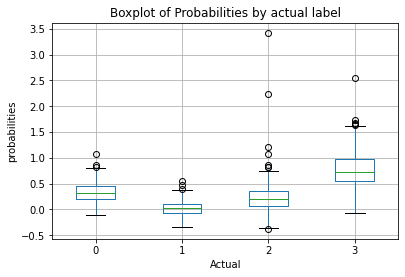

In [18]:
import sys
sys.path.append(r'../models/das44')
from kan_encoders44 import kan_encoder_poly, kan_encoder_foot
import matplotlib.pyplot as plt

metadata['pred_foot'] = metadata.apply(kan_encoder_foot, axis=1)
metadata['pred_poly'] = metadata.apply(kan_encoder_poly, axis=1)
metadata['pred_foot']

# Box plot
metadata.boxplot(column='pred_poly', by='PhenoGraph_clusters')
plt.xlabel('Actual')
plt.ylabel('probabilities')
plt.title('Boxplot of Probabilities by actual label')
plt.suptitle('')  # This removes the automatic title
plt.show()

### 1.4 Define target & features

In [82]:
l_cols = ['SJC_FOOT',  'SJC_HAND',  'TJC_FOOT', 'TJC_HAND',  'SJC44',  'TJC44', 'Small44', 'Big44',
 'Age', 'RF', 'aCCP', 'Sex', 'bigFrac','handFrac', 'pred_foot', 'pred_poly'] 

TARGET = 'PhenoGraph_clusters'

# Define X & y
X = pd.DataFrame(metadata[l_cols].fillna(0)).reset_index(drop=True) 
y_ = metadata[TARGET] 

## 2. Deploy Model

### 2.1 Load pickle model

In [117]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load model
with open("../models/das44/JIP_xgb_pred_44.pk", 'rb') as fin:
    bst = pickle.load(fin) # 
    
    
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=55)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Use the model
y_pred = bst.predict(dtest)


<Figure size 432x288 with 0 Axes>

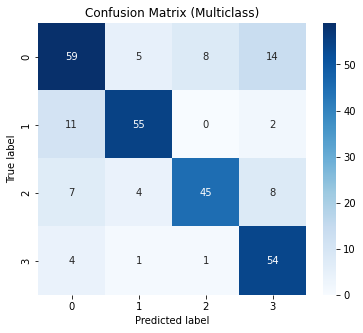

Accuracy: 0.7661870503597122


In [118]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure()

# 1️⃣ Compute confusion matrix

# Convert to predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
labels = np.unique(y_test)

# 2️⃣ Using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Multiclass)')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy:", accuracy)

0
1
2
3


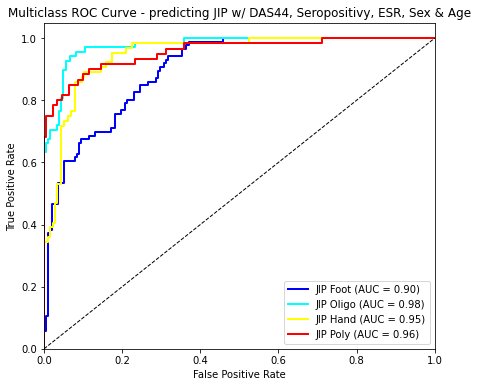

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes =4
y_pred_labels = np.argmax(y_pred, axis=1)


for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(7,6))
colors = ['blue', 'cyan', 'yellow', 'red']
l_labels = ['Foot', 'Oligo', 'Hand', 'Poly']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'JIP {l_labels[i]} (AUC = {roc_auc[i]:0.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - predicting JIP w/ DAS44, Seropositivy, ESR, Sex & Age')
plt.legend(loc="lower right")
plt.show()

## 3. Training model for JIP prediction (example script) 

### 3.1 optuna hyperparameter tuning

In [ ]:
import xgboost as xgb
import optuna
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, precision_recall_curve, auc, precision_recall_fscore_support
import time
from sklearn.metrics import f1_score


TARGET = 'PhenoGraph_clusters'

X = pd.DataFrame(metadata[l_cols]).reset_index(drop=True) 
y_ = metadata[TARGET]


def objective_old(trial, target='PhenoGraph_clusters'):
    
    y = metadata[target]#.replace({0: False, 1: True})
    # Bookmark all predictions
    y_pred = []
    
    # Perform kfold CV
    # Apply 5 fold CV
    kf = KFold(n_splits=3) 
    
    for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
        X_train, X_test = pd.DataFrame(X).loc[train_index], pd.DataFrame(X).loc[test_index]
        Y_train, Y_test = np.take(y_, np.array(train_index)), np.take(y_, np.array(test_index))

        # Normalize
        fit_gaussian = False

        # Model is an XGBClassifier
        dtrain = xgb.DMatrix(X_train,Y_train)
        dtest = xgb.DMatrix(X_test, Y_test)

        t0 = time.time()

        param = {
            'objective': "multi:softprob",
            'num_class':4,
            "eval_metric": "mlogloss",
            "booster": trial.suggest_categorical("booster", ["gbtree", 'dart']),
            "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
            "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        }

        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
            param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
        
        # Try different configurations to find the best
        bst = xgb.train(param, dtrain, trial.suggest_int("n_trees", 15, 200), evals=[(dtest, "validation")], verbose_eval=1) 
        preds = bst.predict(dtest)
        
        # Create a confusion matrix over all data!
        y_pred.extend(bst.predict(dtest))
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    precision, recall, f1, support = precision_recall_fscore_support(y_, y_pred_labels, average='weighted') # micro
    print(trial._trial_id)
    return f1 

study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective_old(trial, 'PhenoGraph_clusters'), n_trials=500) # test # 2000 # -1 -> bootstrapping (take random 100 samples) , n_jobs=1
print('Best trial: %s' % study.best_trial.number)
print('Performance (auc): %s' % study.best_trial.value)
print('Corresponding Parameters: %s' % study.best_trial.params)


import plotly as py

fig = optuna.visualization.plot_optimization_history(study)
py.offline.plot(fig, filename='hyperparamtuning_optimization_%s_500iter.html' % (TARGET), auto_open=False)

### 3.2 sanity check 

In [ ]:
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import time
import seaborn as sn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import pickle

X = pd.DataFrame(metadata[l_cols]).reset_index(drop=True) 
y_ = metadata[TARGET]
y_pred =[]

# Apply 3 fold CV
kf = KFold(n_splits=3) # 
iteration = 0

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index[:10], "TEST:", test_index[:10])
    X_train, X_test = pd.DataFrame(X).loc[train_index], pd.DataFrame(X).loc[test_index]
    Y_train, Y_test = np.take(y_, np.array(train_index)), np.take(y_, np.array(test_index))

    # Normalize
    fit_gaussian = False

    # Model is an XGBClassifier
    n_trees = 187
    dmat_train = xgb.DMatrix(X_train,Y_train)
    dmat_test = xgb.DMatrix(X_test, Y_test)

    t0 = time.time()

    # Best with 187 = 80 accuracy-s No Hb/ Lym/ ESR
    bst = xgb.train({'objective': "multi:softprob", "num_class": 4, 'booster': 'dart', 'lambda': 0.0011711606268915969, 'alpha': 0.9057920953044905, 'learning_rate': 0.10393370320154525, 'subsample': 0.8910308246741256, 'colsample_bytree': 0.7762677421471329, 'max_depth': 1, 'eta': 0.003950473310015185, 'gamma': 0.0019000332067239686, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4.788549527639424e-05, 'skip_drop': 0.02446525282860378},
         dmat_train,  n_trees, evals=[(dmat_train, "train"), (dmat_test, "test")])
    
    y_pred.extend(bst.predict(dmat_test))
    
    
    t1 = time.time()
    print('Time for Training XGB model %s: %s' % (str(iteration+1), str(t1-t0)))
    iteration += 1
    


### 3.3 save final model 

In [ ]:
# Save  model w/ Pickle
with open('../models/das44/JIP_xgb_pred_44_new.pk', 'wb') as fin:
    pickle.dump(bst, fin)

### 3.4 Calculate best cut-off

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score

def class_wise_report(y_true, y_pred, class_names=None, digits=3):
    """
    Return a DataFrame with sensitivity, specificity, ppv, npv, accuracy
    for every class in a multiclass problem plus a final 'macro-average' row.
    """
    labels = np.unique(y_true)
    if class_names is None:
        class_names = [f"class_{i}" for i in labels]

    mcm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)

    metrics = []
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mcm[i].ravel()
        sens = tp / (tp + fn + 1e-9)
        spec = tn / (tn + fp + 1e-9)
        ppv  = tp / (tp + fp + 1e-9)
        npv  = tn / (tn + fn + 1e-9)
        acc  = (tp + tn) / (tp + tn + fp + fn)
        metrics.append([sens, spec, ppv, npv, acc])

    # macro-average
    macro = np.array(metrics).mean(axis=0)
    metrics.append(macro)

    # overall (micro) accuracy
    overall_acc = accuracy_score(y_true, y_pred)

    # build DataFrame
    class_names = list(class_names)
    class_names.append("macro-avg")
    df = pd.DataFrame(metrics,
                      columns=["sens", "spec", "ppv", "npv", "accuracy"],
                      index=class_names)
    df.loc["macro-avg", "accuracy"] = overall_acc   # overwrite with micro accuracy
    return df.round(digits)


fig = plt.figure()

# 1️⃣ Compute confusion matrix

# Convert to predicted class labels

y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_, y_pred_labels)
labels = np.unique(y_)

# 2️⃣ Using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Multiclass)')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print("\nClassification Report:\n", classification_report(y_, y_pred_labels))
print(class_wise_report(y_, y_pred_labels,
                            class_names=labels))

print("Accuracy:", accuracy)

Keeping 1148 of 1387 samples (82.8%)
[0.72, 0.45, 0.45, 0.72]
Confusion matrix for confident predictions (threshold:[0.72, 0.45, 0.45, 0.72])


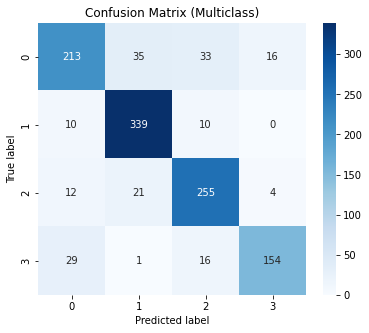

Accuracy: 0.8371080139372822
            sens   spec    ppv    npv  accuracy
0          0.717  0.940  0.807  0.905     0.882
1          0.944  0.928  0.856  0.973     0.933
2          0.873  0.931  0.812  0.956     0.916
3          0.770  0.979  0.885  0.953     0.943
macro-avg  0.826  0.944  0.840  0.947     0.837


In [124]:
#y_confidence = np.max(y_pred, axis=1)

# 2️⃣ Define confidence threshold
threshold = 0.72

# PPV above 80
thresholds= [0.72, 0.45, 0.45, 0.72]

# PPV above 85
#thresholds= [0.845, 0.434, 0.691, 0.550]
def predict_with_cutoffs_and_reject(y_proba, thresholds):
    above = y_proba >= thresholds
    preds = np.argmax(y_proba, axis=1)   # default prediction

    final = []
    for i in range(len(y_proba)):
        if not np.any(above[i]):
            final.append(-1)  # or 'no_prediction'
        else:
            # pick among those above threshold
            valid_classes = np.where(above[i])[0]
            best = valid_classes[np.argmax(y_proba[i][valid_classes])]
            final.append(best)

    return np.array(final)

y_pred_thresh = predict_with_cutoffs_and_reject(np.array(y_pred), thresholds)
mask_confident = y_pred_thresh != -1

# 3️⃣ Filter only confident predictions
#mask_confident = y_confidence >= threshold

y_true_conf = y_[mask_confident]
y_pred_conf = y_pred_labels[mask_confident]

print(f"Keeping {mask_confident.sum()} of {len(y_)} samples ({mask_confident.mean()*100:.1f}%)")

# 4️⃣ Compute confusion matrix
cm = confusion_matrix(y_true_conf, y_pred_conf)
print(thresholds)
print("Confusion matrix for confident predictions (threshold:" + str(thresholds) + ')')
#print(cm)

labels = np.unique(y_pred_conf)

# 2️⃣ Using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (Multiclass)')
plt.show()

# Accuracy
accuracy = np.trace(cm) / np.sum(cm)
print("Accuracy:", accuracy)
print(class_wise_report(y_true_conf, y_pred_conf,
                            class_names=labels))

### 3.5 show probability per cluster

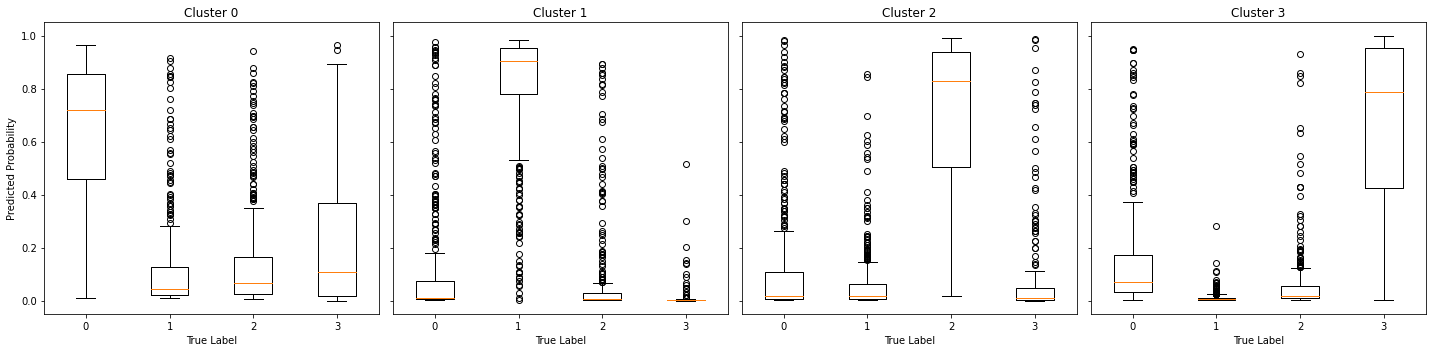

In [103]:

n_clusters = np.array(y_pred).shape[1]

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 5), sharey=True)

for k in range(n_clusters):
    df = pd.DataFrame({
        "prob": np.array(y_pred)[:, k],
        "true_label": y_
    })

    axes[k].boxplot(
        [df[df["true_label"] == c]["prob"] for c in sorted(df["true_label"].unique())],
        labels=sorted(df["true_label"].unique())
    )
    axes[k].set_title(f"Cluster {k}")
    axes[k].set_xlabel("True Label")
    if k == 0:
        axes[k].set_ylabel("Predicted Probability")

plt.tight_layout()
plt.show()

## 4. Feature importance

### 4.1 Show SHAP

In [132]:
import shap
import time

t0 = time.time()
# Train XGBoost model with booster='dart' (regular TreeExplainer does not work for dart)

# Wrapper function to safely handle DMatrix conversion -> For booster 'dart'
def safe_predict(data):
    return bst.predict(xgb.DMatrix(data))

# Use shap.Explainer with the wrapper
t_explainer = shap.Explainer(safe_predict, X_test)

#t_explainer = shap.Explainer(final_model.predict, x_test[l_elastic])
shap_values = t_explainer(X_test)
                                   

t1 = time.time()
print('Calculating SHAP: ' + str(t1-t0))



Permutation explainer: 279it [05:12,  1.16s/it]                         

Calculating SHAP: 312.84055829048157


In [145]:
import matplotlib.pyplot as plt

N_FEAT = 16

# Create SHAP per cluster
for i in range(4):
    plt.figure(figsize=(10, 6))  
    shap.plots.beeswarm(shap_values[:,:, i], max_display=N_FEAT, show=False)

    plt.savefig('../figures/das44/shap_top%s_cluster_%s.png' % (str(N_FEAT), str(i)), dpi=100, bbox_inches='tight')
    # Save the figure
    plt.close()  # Close the figure to prevent displaying again
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [122]:
import numpy as np

cluster_id = 3
cluster_labels = shap_values.data[:, cluster_id]  # e.g., 0,1,2...
unique_clusters = np.unique(cluster_labels)

mean_shap_per_cluster = {}

for cluster_id in unique_clusters:
    # get indices of samples in cluster
    idx = np.where(cluster_labels == cluster_id)[0]
    
    # compute mean absolute SHAP across classes
    mean_values_all_classes = np.mean(
        [np.mean(np.abs(sv.values[idx, :]), axis=0) for sv in shap_values],
        axis=0
    )
    
    mean_shap_per_cluster[cluster_id] = mean_values_all_classes
    
import shap
import matplotlib.pyplot as plt

cluster_id = 1  # example
mean_values = mean_shap_per_cluster[cluster_id]

expl = shap.Explanation(values=mean_values,
                        data=np.zeros((1, mean_values.shape[0])),  # dummy data
                        feature_names=feature_names)

shap.plots.bar(expl, max_display=20)

IndexError: index 16 is out of bounds for axis 0 with size 14

In [ ]:
cluster_idx=3
plt.bar(l_cols,mean_values[:, cluster_idx])
plt.xticks(rotation=90, ha='right') 

In [126]:
mean_values

array([[0.17281245, 0.18248866, 0.33780348, 0.36304858],
       [0.16615248, 0.22497363, 1.8448565 , 0.05439147],
       [0.77979386, 0.8479733 , 0.4993901 , 0.95318896],
       [0.08624418, 0.23097786, 1.6553495 , 0.1777147 ],
       [0.14692141, 0.66878504, 0.1655015 , 0.31756717],
       [0.3769438 , 1.5089272 , 0.1667305 , 1.5605783 ],
       [0.38084972, 0.34124017, 0.2616449 , 0.359194  ],
       [0.23066089, 0.42503527, 0.14343418, 0.17858344],
       [0.13855414, 0.3077117 , 0.07053702, 0.18310575],
       [0.13834026, 0.26267368, 0.19291644, 0.12689379],
       [0.1970661 , 0.13245419, 0.41389143, 0.44438002],
       [0.04533856, 0.02235405, 0.03645591, 0.07788751],
       [0.07397665, 0.06921124, 0.00507216, 0.04313339],
       [0.05660297, 0.02582311, 0.01280063, 0.01990306]], dtype=float32)

In [135]:
shap.plots.bar(shap_values[:, :, cluster_idx].mean(0), order=shap.Explanation.argsort)

NameError: name 'cluster_idx' is not defined

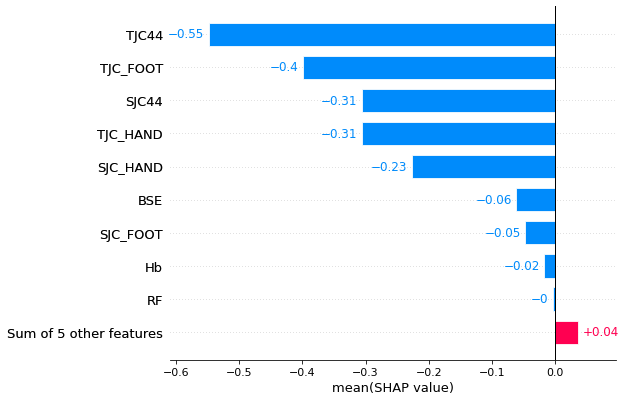

In [109]:
cluster_idx = 1

explainer = shap.TreeExplainer(bst)
shap_values = explainer(X_train)  # multi-class

shap.plots.bar(shap_values[:, :, cluster_idx].mean(0), order=shap.Explanation.argsort)